# Analysis of survey 10009 (Cocktails survey II)

In [1]:
import matplotlib
import pandas as pd

pd.options.display.max_columns = 50

%matplotlib inline

In [2]:
ideas = pd.read_csv('wikisurvey_10009_ideas_2017-02-11T16-29-47Z.csv')
votes = pd.read_csv('wikisurvey_10009_votes_2017-02-11T16-29-52Z.csv')

In [3]:
ideas.head(1)

,Wikisurvey ID,Idea ID,Idea Text,Wins,Losses,Times involved in Cant Decide,Score,User Submitted,Session ID,Created at,Last Activity,Active,Appearances on Left,Appearances on Right,Info
0,10009,625098,Long Island Iced Tea,49,33,3,59.5238,False,4877552,2017-01-23 04:21:12 UTC,2017-02-11 15:39:10 UTC,True,43,52,NaN


In [4]:
ideas = ideas[ideas['Appearances on Left'] + ideas['Appearances on Right'] > 0]

In [5]:
len(ideas)

10

In [6]:
len(votes)

437

In [7]:
votes.head(1)

,Vote ID,Session ID,Wikisurvey ID,Winner ID,Winner Text,Loser ID,Loser Text,Prompt ID,Appearance ID,Left Choice ID,Right Choice ID,Created at,Updated at,Response Time (s),Missing Response Time Explanation,Valid,Hashed IP Address,URL Alias,User Agent,Referrer,Widget,Info
0,15597134,4882379,10009,625094,Dark and Stormy,625095,Manhattan,23997697,22007381,625095,625094,2017-01-31 04:57:57 UTC,2017-01-31 04:57:57 UTC,6.62,NaN,True,ed3a85e9bde09ca42fb6e212c579694d,cocktailparty2,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like M...,http://m.facebook.com,False,NaN


In [8]:
len(votes['Session ID'].unique())

28

In [9]:
len(votes['Hashed IP Address'].unique())

28

In [10]:
len(votes['Winner ID'].unique())

10

In [11]:
len(votes['Loser ID'].unique())

10

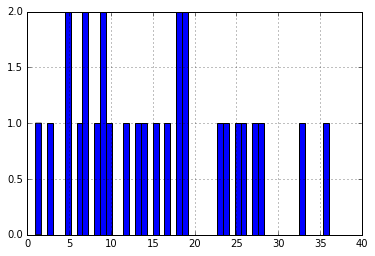

In [12]:
votes.groupby('Hashed IP Address').count()['Vote ID'].hist(bins=50)

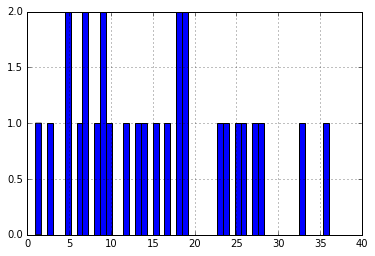

In [13]:
votes.groupby('Session ID').count()['Vote ID'].hist(bins=50)

In [14]:
data = votes[['Winner ID', 'Loser ID', 'Hashed IP Address']].copy()
data.head()

,Winner ID,Loser ID,Hashed IP Address
0,625094,625095,ed3a85e9bde09ca42fb6e212c579694d
1,625093,625096,ed3a85e9bde09ca42fb6e212c579694d
2,625100,625095,ed3a85e9bde09ca42fb6e212c579694d
3,625092,625093,ed3a85e9bde09ca42fb6e212c579694d
4,625093,625096,ed3a85e9bde09ca42fb6e212c579694d


In [15]:
data['value'] = (data['Winner ID'] > data['Loser ID']).apply(int)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value
0,625094,625095,ed3a85e9bde09ca42fb6e212c579694d,0
1,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0
2,625100,625095,ed3a85e9bde09ca42fb6e212c579694d,1
3,625092,625093,ed3a85e9bde09ca42fb6e212c579694d,0
4,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0


In [16]:
data['bigIndex'] = data[['Winner ID', 'Loser ID']].apply(max, axis=1)
data['smallIndex'] = data[['Winner ID', 'Loser ID']].apply(min, axis=1)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex
0,625094,625095,ed3a85e9bde09ca42fb6e212c579694d,0,625095,625094
1,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0,625096,625093
2,625100,625095,ed3a85e9bde09ca42fb6e212c579694d,1,625100,625095
3,625092,625093,ed3a85e9bde09ca42fb6e212c579694d,0,625093,625092
4,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0,625096,625093


In [17]:
data['userId'] = data['Hashed IP Address']

In [18]:
# data['smallIndex'] -= data['smallIndex'].min()
# data['bigIndex'] -= data['bigIndex'].min()

In [19]:
item_map = {}
for i, item_id in enumerate(ideas['Idea ID'].sort_values()): 
    item_map[item_id] = i
    
text_map = {}
id_to_text = ideas.set_index('Idea ID')['Idea Text']
for item in item_map:
    text_map[item_map[item]] = id_to_text[item]

In [20]:
pd.DataFrame.from_dict(item_map, orient='index').to_csv('item_map.csv', header=False)

In [21]:
pd.DataFrame.from_dict(text_map, orient='index').to_csv('text_map.csv', header=False)

In [22]:
for item in item_map:
    data.loc[data['smallIndex'] == item, 'smallIndex'] = item_map[item]
    data.loc[data['bigIndex'] == item, 'bigIndex'] = item_map[item]

In [23]:
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex,userId
0,625094,625095,ed3a85e9bde09ca42fb6e212c579694d,0,3,2,ed3a85e9bde09ca42fb6e212c579694d
1,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0,4,1,ed3a85e9bde09ca42fb6e212c579694d
2,625100,625095,ed3a85e9bde09ca42fb6e212c579694d,1,8,3,ed3a85e9bde09ca42fb6e212c579694d
3,625092,625093,ed3a85e9bde09ca42fb6e212c579694d,0,1,0,ed3a85e9bde09ca42fb6e212c579694d
4,625093,625096,ed3a85e9bde09ca42fb6e212c579694d,0,4,1,ed3a85e9bde09ca42fb6e212c579694d


In [24]:
data[['smallIndex', 'bigIndex', 'value', 'userId']].to_csv('dat.csv', index=False, header=False)
pd.read_csv('dat.csv', header=None)

,0,1,2,3
0,2,3,0,ed3a85e9bde09ca42fb6e212c579694d
1,1,4,0,ed3a85e9bde09ca42fb6e212c579694d
2,3,8,1,ed3a85e9bde09ca42fb6e212c579694d
3,0,1,0,ed3a85e9bde09ca42fb6e212c579694d
4,1,4,0,ed3a85e9bde09ca42fb6e212c579694d
5,7,8,1,ed3a85e9bde09ca42fb6e212c579694d
6,0,4,0,ed3a85e9bde09ca42fb6e212c579694d
7,1,8,1,ed3a85e9bde09ca42fb6e212c579694d
8,0,6,0,ed3a85e9bde09ca42fb6e212c579694d
9,2,6,0,ed3a85e9bde09ca42fb6e212c579694d
